# **Assignment 8**

# Introduction

I'll use the `Citywide Payroll Data (Fiscal Year)` from [cityofnewyork.us](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e/about_data). With this dataset, I'll be diving into the hours that someone works.

Overtime, in excess, can be interpreted as a metric that the tasks that people are performing are understaffed and can be an area of opportunity for opening new roles and helping with unemployment within the city. We will be looking at roles in Brooklyn with the most overtime worked.

In [1]:
# Loading in Pandas
import pandas as pd

# Getting the data from the URL and showing the first 5 records
salary_url = 'https://data.cityofnewyork.us/api/views/k397-673e/rows.csv?fourfour=k397-673e&cacheBust=1706801234&date=20241021&accessType=DOWNLOAD'
salary_df = pd.read_csv(salary_url)
salary_df.head()

C:\Users\Richie\AppData\Local\Temp\ipykernel_17416\1591543879.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  salary_df = pd.read_csv(salary_url)


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


______________
# Data Exploration

For data exploration we'll be looking at statistics and getting high level information of our dataset.

Firstly, we'll get the number of rows and columns in this dataset:

In [2]:
# Get the shape of the data:
print(f"This data has:\n\t{salary_df.shape[0]:,} rows\n\t{salary_df.shape[1]} columns")

This data has:
	6,225,611 rows
	17 columns


Now we'll investigate the datatypes available. The output of the lines below will give each column which we can look at and their datatype where `object` means `string`:

In [3]:
# Getting datatypes
salary_df.dtypes

Fiscal Year                     int64
Payroll Number                float64
Agency Name                    object
Last Name                      object
First Name                     object
Mid Init                       object
Agency Start Date              object
Work Location Borough          object
Title Description              object
Leave Status as of June 30     object
Base Salary                   float64
Pay Basis                      object
Regular Hours                 float64
Regular Gross Paid            float64
OT Hours                      float64
Total OT Paid                 float64
Total Other Pay               float64
dtype: object

Now we will see the number of unique values for each column:

In [4]:
# Getting number of unique values
salary_df.nunique()

Fiscal Year                        11
Payroll Number                    160
Agency Name                       170
Last Name                      184781
First Name                     107499
Mid Init                           45
Agency Start Date               16344
Work Location Borough              22
Title Description                1990
Leave Status as of June 30          5
Base Salary                    119744
Pay Basis                           4
Regular Hours                   98991
Regular Gross Paid            2434961
OT Hours                        67008
Total OT Paid                 1165664
Total Other Pay               1365435
dtype: int64

Using `df.describe()` we can see the quartiles, mean, standard deviation, maximum, and minimum values.

In [5]:
# Getting the summary stats of the dataframe
salary_df.describe().style.format("{:.2f}")

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,6225611.00,4480171.00,6225611.00,6225611.00,6225611.00,6225611.00,6225611.00,6225611.00
mean,2019.07,573.77,45908.12,657.56,43751.98,64.63,3636.35,3323.45
std,3.13,302.66,44374.89,885.54,41683.51,168.83,10490.05,6667.48
min,2014.00,2.00,0.01,-2240.00,-205451.85,-209.00,-26493.88,-281595.04
25%,2016.00,300.00,33.18,0.00,3475.03,0.00,0.00,0.00
50%,2019.00,742.00,43878.00,0.00,36236.46,0.00,0.00,103.56
75%,2022.00,747.00,81977.00,1820.00,76278.53,0.00,117.53,4265.53
max,2024.00,996.00,414799.00,6666.00,684970.17,3692.90,527532.01,714664.29


By using `df.median()` we can get the median value for each column. In order to not get an error, we will pass the argument `numeric_only = True`:

In [6]:
# Getting the median values of each numeric
salary_df.median(numeric_only = True)

Fiscal Year            2019.00
Payroll Number          742.00
Base Salary           43878.00
Regular Hours             0.00
Regular Gross Paid    36236.46
OT Hours                  0.00
Total OT Paid             0.00
Total Other Pay         103.56
dtype: float64

Moving on, we will use `df.isnull().sum()` to get a count of null emtries by column:

In [7]:
# Getting missing value counts
salary_df.isnull().sum()

Fiscal Year                         0
Payroll Number                1745440
Agency Name                         0
Last Name                       13608
First Name                      13673
Mid Init                      2560039
Agency Start Date                 140
Work Location Borough          506234
Title Description                 164
Leave Status as of June 30          0
Base Salary                         0
Pay Basis                           0
Regular Hours                       0
Regular Gross Paid                  0
OT Hours                            0
Total OT Paid                       0
Total Other Pay                     0
dtype: int64

______________
# Data Wrangling

#### 1. Modify multiple column names
I always prefer to have all lowercase and no spaces within my column names:

In [8]:
# Making all columns lowercase and replacing all spaces with underscores
salary_df.columns = salary_df.columns.str.lower().str.replace(' ','_')

salary_df.head(2)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


#### 2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

From using `df.dtypes` above, we can see that `agency_start_date` is the only field that needs to be modified. It needs to be converted from an object to a `datetime`. There are a few invalid dates, we will use the `errors = 'coerce'` argument to set these to `NaT`:

In [9]:
# Converting a date field
salary_df['agency_start_date'] = pd.to_datetime(salary_df['agency_start_date'], errors = 'coerce')

salary_df.dtypes

fiscal_year                            int64
payroll_number                       float64
agency_name                           object
last_name                             object
first_name                            object
mid_init                              object
agency_start_date             datetime64[ns]
work_location_borough                 object
title_description                     object
leave_status_as_of_june_30            object
base_salary                          float64
pay_basis                             object
regular_hours                        float64
regular_gross_paid                   float64
ot_hours                             float64
total_ot_paid                        float64
total_other_pay                      float64
dtype: object

#### 4. Create new columns based on existing columns or calculations.
I'll start by creating a new column called `fixed_regular_hours` and `fixed_ot_hours` setting any negative hours worked to be 0:

In [10]:
salary_df['fixed_regular_hours'] = salary_df['regular_hours'].apply(lambda x: 0 if x < 0 else x)
salary_df['fixed_ot_hours'] = salary_df['ot_hours'].apply(lambda x: 0 if x < 0 else x)

salary_df.head(2)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,fixed_regular_hours,fixed_ot_hours
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,2015-08-10,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,1820.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,2016-09-12,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,1820.0,0.0


#### 5. Drop column(s) from your dataset.
We're going to remove columns which aren't needed for our analysis:

In [20]:
columns_to_keep = [
    'fiscal_year',
    'agency_name',
    'work_location_borough',
    'title_description',
    'fixed_regular_hours',
    'fixed_ot_hours',
    'first_name',
    'regular_gross_paid',
    'total_ot_paid'
]
trimmed_df = salary_df[columns_to_keep]
trimmed_df['total_pay'] = trimmed_df['total_ot_paid'] + trimmed_df['regular_gross_paid']

trimmed_df.head(2)

C:\Users\Richie\AppData\Local\Temp\ipykernel_17416\2838832630.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_df['total_pay'] = trimmed_df['total_ot_paid'] + trimmed_df['regular_gross_paid']


,fiscal_year,agency_name,work_location_borough,title_description,fixed_regular_hours,fixed_ot_hours,first_name,regular_gross_paid,total_ot_paid,total_pay
0,2020,OFFICE OF EMERGENCY MANAGEMENT,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,1820.0,0.0,MIKHAIL,84698.21,0.0,84698.21
1,2020,OFFICE OF EMERGENCY MANAGEMENT,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,1820.0,0.0,VERONICA,84698.21,0.0,84698.21


#### 7. Sort your data based on multiple variables.
For this data, it'd likely be best to see it sorted by `fiscal_year` ascending and `ot_hours` descending:

In [21]:
#trimmed_df = 
trimmed_df.sort_values(['fiscal_year', 'fixed_ot_hours'], ascending = [True, False])

,fiscal_year,agency_name,work_location_borough,title_description,fixed_regular_hours,fixed_ot_hours,first_name,regular_gross_paid,total_ot_paid,total_pay
2667900,2014,DEPARTMENT OF BUILDINGS,NaN,ASSOCIATE INSPECTOR,2085.72,3347.5,JOHN,68609.12,179099.31,247708.43
2699334,2014,DEPARTMENT OF TRANSPORTATION,NaN,SUPERVISOR OF BRIDGE OPERATIONS,2085.72,2354.5,ANTHONY,55839.68,70426.61,126266.29
2668585,2014,DEPARTMENT OF BUILDINGS,NaN,COMMUNITY ASSOCIATE,1825.00,2096.0,DANIEL,40923.49,47094.83,88018.32
2698195,2014,DEPARTMENT OF TRANSPORTATION,NaN,SUPERVISOR OF BRIDGE OPERATIONS,2085.72,2068.0,BRIAN,56002.18,52684.66,108686.84
2668004,2014,DEPARTMENT OF BUILDINGS,NaN,ASSOCIATE INSPECTOR,2085.72,2001.5,MARIO,69144.52,102172.46,171316.98
...,...,...,...,...,...,...,...,...,...,...
6225600,2024,NYC HOUSING AUTHORITY,QUEENS,DIRECTOR OF PLANT OPERATIONS & MAINTENANCE,420.00,0.0,RAJAPPAN,32396.96,0.00,32396.96
6225602,2024,NYC HOUSING AUTHORITY,MANHATTAN,EXECUTIVE AGENCY COUNSEL,840.00,0.0,JACQUELINE,50497.15,0.00,50497.15
6225604,2024,NYC HOUSING AUTHORITY,MANHATTAN,CARETAKER,0.00,0.0,XIAMIN,0.00,0.00,0.00
6225609,2024,NYC HOUSING AUTHORITY,MANHATTAN,ADMINISTRATIVE HOUSING SUPERINTENDENT,791.00,0.0,ANTHONY,70782.20,0.00,70782.20


#### 9. Convert all the string values to upper or lower cases in one column.
We'll apply this to make every string column lowercase:

In [22]:
for column in trimmed_df.columns:
    if trimmed_df[column].dtype == "O":
        trimmed_df[column] = trimmed_df[column].str.lower()

trimmed_df.head(2)

C:\Users\Richie\AppData\Local\Temp\ipykernel_17416\4056629463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_df[column] = trimmed_df[column].str.lower()


,fiscal_year,agency_name,work_location_borough,title_description,fixed_regular_hours,fixed_ot_hours,first_name,regular_gross_paid,total_ot_paid,total_pay
0,2020,office of emergency management,brooklyn,emergency preparedness manager,1820.0,0.0,mikhail,84698.21,0.0,84698.21
1,2020,office of emergency management,brooklyn,emergency preparedness manager,1820.0,0.0,veronica,84698.21,0.0,84698.21


#### 10. Check whether numeric values are present in a given column of your dataframe.
We'll check each column to see if it's numeric and report which ones are:

In [24]:
numeric_possible = {col: pd.to_numeric(trimmed_df[col], errors='coerce').notna().any() for col in trimmed_df.columns}

for col, can_be_numeric in numeric_possible.items():
    print(f"{col}: {'Can be numeric' if can_be_numeric else 'Cannot be numeric'}")

trimmed_df.head(2)


fiscal_year: Can be numeric
agency_name: Cannot be numeric
work_location_borough: Cannot be numeric
title_description: Cannot be numeric
fixed_regular_hours: Can be numeric
fixed_ot_hours: Can be numeric
first_name: Can be numeric
regular_gross_paid: Can be numeric
total_ot_paid: Can be numeric
total_pay: Can be numeric


,fiscal_year,agency_name,work_location_borough,title_description,fixed_regular_hours,fixed_ot_hours,first_name,regular_gross_paid,total_ot_paid,total_pay
0,2020,office of emergency management,brooklyn,emergency preparedness manager,1820.0,0.0,mikhail,84698.21,0.0,84698.21
1,2020,office of emergency management,brooklyn,emergency preparedness manager,1820.0,0.0,veronica,84698.21,0.0,84698.21


#### 11. Group your dataset by one column, and get the mean, min, and max values by group.
- Groupby()
- agg() or .apply()

We'll group by the `agency_name` column and see how `fixed_regular_hours` and `fixed_ot_hours` varies by group:

In [ ]:
annual_summary['ot_proportion'] = annual_summary[('fixed_ot_hours', 'sum')] / (annual_summary[('fixed_regular_hours', 'sum')] + annual_summary[('fixed_ot_hours', 'sum')])
annual_summary['ot_proportion'].head(20)

fiscal_year  agency_name             
2020         police department           0.152377
2022         police department           0.155407
2023         police department           0.132753
2022         fire department             0.226552
2015         police department           0.121074
2016         police department           0.111518
2019         police department           0.104554
2021         police department           0.106806
2018         police department           0.103049
2017         police department           0.103672
2021         fire department             0.194717
2020         fire department             0.176312
2023         fire department             0.174667
2015         fire department             0.151683
2019         fire department             0.141919
2016         fire department             0.141691
2017         fire department             0.132990
2018         fire department             0.130816
2022         department of sanitation    0.190334
2021        

#### 11. Filter the dataset to only include one of the 5 NYC Boroughs

In [27]:
nyc_boroughs = [
    'brooklyn',
    'manhattan',
    'bronx',
    'richmond',
    'queens'
]

trimmed_df = trimmed_df.loc[trimmed_df['work_location_borough'].isin(nyc_boroughs)]

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

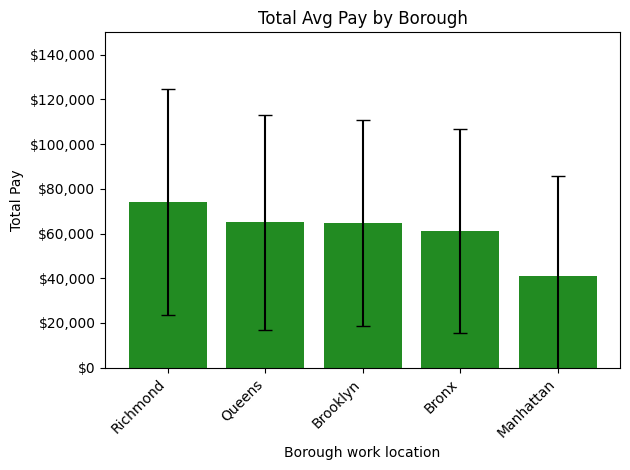

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

gropuped_work_info = trimmed_df[['work_location_borough','total_pay']].groupby('work_location_borough').agg(['mean','std','count']).reset_index().sort_values(('total_pay','mean'), ascending=False)

plt.bar(
    x = gropuped_work_info['work_location_borough'].str.title(),
    height = gropuped_work_info[('total_pay','mean')],
    yerr = gropuped_work_info[('total_pay','std')],
    color = 'forestgreen',
    capsize = 5
)

plt.xlabel("Borough work location")
plt.ylabel("Total Pay")
plt.title("Total Avg Pay by Borough")

plt.xticks(rotation = 45, ha='right')
plt.ylim((0, 150000))

# A function to display something in dollars
def dollar_formatter(x, pos):
    return f"${x:,.0f}"

plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_formatter))

plt.tight_layout()

plt.show()

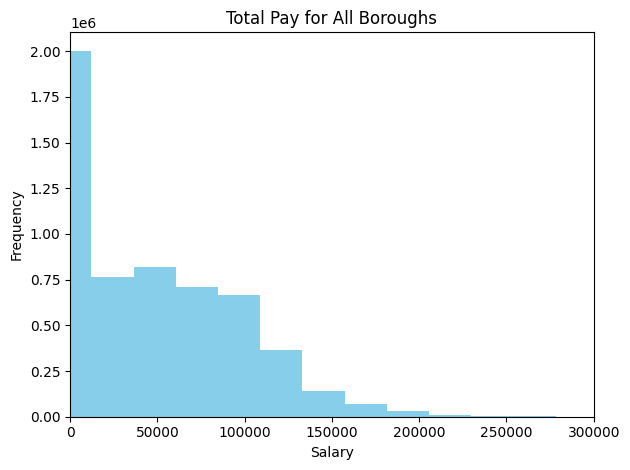

In [36]:
plt.hist(
    trimmed_df['total_pay'],
    bins = 50,
    color = 'skyblue'
)

plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Total Pay for All Boroughs")

plt.xlim((0,300000))

plt.tight_layout()

# Display the plot
plt.show()


### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.

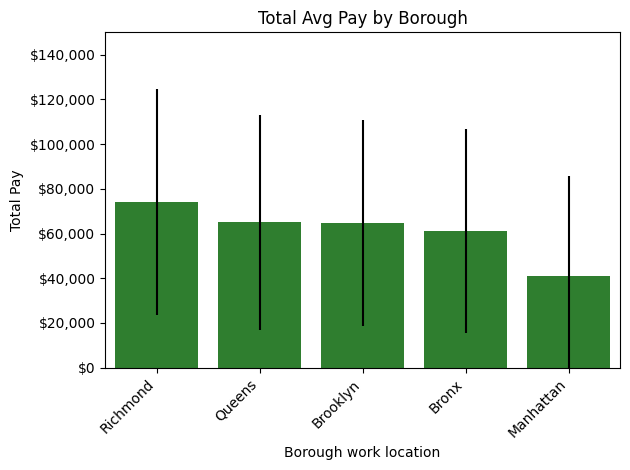

In [43]:
import seaborn as sns

seaborn_data = gropuped_work_info.copy()
seaborn_data['work_location_borough'] = seaborn_data['work_location_borough'].str.title()

sns.barplot(
    data=seaborn_data,
    x='work_location_borough',
    y=('total_pay', 'mean'),
    yerr=gropuped_work_info[('total_pay', 'std')],
    color='forestgreen',
    capsize=5
)

plt.xlabel("Borough work location")
plt.ylabel("Total Pay")
plt.title("Total Avg Pay by Borough")

plt.xticks(rotation = 45, ha='right')
plt.ylim((0, 150000))

# A function to display something in dollars
def dollar_formatter(x, pos):
    return f"${x:,.0f}"

plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_formatter))

plt.tight_layout()

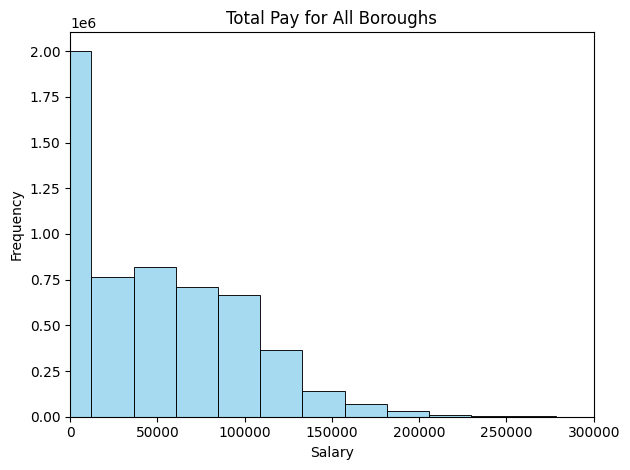

In [45]:
sns.histplot(
    data=trimmed_df,
    x='total_pay',
    bins=50,
    color='skyblue'
)

# Add labels and title
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Total Pay for All Boroughs")
plt.xlim(0, 300000)

# Optimize layout
plt.tight_layout()

plt.show()

### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.


In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.
After converting the first matplotlib graphics to seaborn it was pretty obvious to me that the commands to modify portions of the graphics were the same in seaborn as matplotlib. That being said, I do prefer using seaborn as the default created visuals are better and more user friendly than those of matplotlib.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  
One large thing I've noticed on the bar plots is the standard deviation in total pay for Manhattan went negative, suggesting that there are great differences between the total_pay. Additionally, I was shocked to see that the mean salaries in Staten Island (Richmond County) were the greatest and that those in Manhattan were the lowest. That insight goes against my intuition which assumed that Manhattan would have had the highest salaries.